In [20]:
%matplotlib inline
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl

# Size matters in plots.
pl.rcParams['figure.figsize'] = (12.0, 10.0)

# Plotting with style! 
import seaborn as sb
from matplotlib.pyplot import cm



$\LaTeX \text{ commands here}
\newcommand{\R}{\mathbb{R}}
\newcommand{\im}{\text{im}\,}
\newcommand{\norm}[1]{||#1||}
\newcommand{\inner}[1]{\langle #1 \rangle}
\newcommand{\span}{\mathrm{span}}
\newcommand{\proj}{\mathrm{proj}}
$

<hr style="border: 5px solid black">

**Georgia Tech, CS 4540**

# L1:  Welcome and Introduction

Jacob Abernethy

*Tuesday, August 20, 2018*

### Outline

1. Welcome to the course!
    * What this course is about
    * What this course is NOT about
    * The structure of the course, "flipped classroom"
    * Quizzes
    * Homeworks and Exams
    * Using jupyter notebooks
2. A taste of what's to come
    * One of the simplest learning algorithms: perceptron
    * Proof of perceptron's performance

## What is this course about?

We are in a new world:
- much of industry now views their main resource is **data**
- In 2005 the question was: "how do I efficiently store this data? How do I run queries more quickly?"
- In 2019 the question is: "how do I leverage all this data for business decisions and customer value?"

This has driven the push for Machine Learning and Data Science.

This core question of this course: **What are the algorithmic foundations of data science + ML?**




## What is this course NOT about?

- It's NOT about deep learning or Tensorflow (although we may learn a little about neural networks)
- It's NOT about graph algorithms or matchings
- It's NOT a coding course (although it may involve some *python* coding)

Also: there will NOT be a fixed textbook -- although you may find some textbooks useful.


## Structure of the course: FLIPPED classroom

The *classical* way of teaching: lecture time reserved to describe content such as definitions and tools, and students solve challenge problems at home.

The *flipped-classroom* style: students learn definitions and tools at home, lecture time is reserved for interactive problem solving in groups.
* Each lecture will have an associated reading, posted a week before class, for students to go through. It shouldn't take much more than an hour!
* Each lecture I will present 4-8 problems, and students will work on them in groups with the help of the instructor(s).

**WHY FLIP?** Instruction time is precious. Why waste it just listening to a lecture? Only thing we care about, and that we evaluate you on, is problem solving!

## The challenge with the flipped classroom:
### We need to force students to actually do readings outside of class!

**Solution**: We will *quiz* you at the beginning of each lecture. The quiz checks if you've done the reading or not, and penalizes you if you haven't.

You need to bring a laptop, phone, or tablet, in order to take the quiz. Quizzes are given through Canvas, but you will be required to be in class to take the quiz.

**Quiz scoring**: 2 points for correct answer, 1 point for any answer, 0 points for no-show. You get 5 quiz drops over the course of the semester!



## Homeworks and Exams

Aside from quizzes, course evaluation will be as follows:
1. Homework 1 due
1. Homework 2 due
1. Homework 3 due
1. *Midterm Exam* (in class)
1. Homework 4 due
1. Homework 5 due
1. Homework 6 due
1. *Final Exam* 

## Course grade rubric

|Content|Score|
|------|------|
|Homeworks|35%|
|Attendance Quizzes|15%|
|Midterm Exam|20%|
|Final Exam|30%|


## Let's look at an implementation of the Perceptron Algorithm

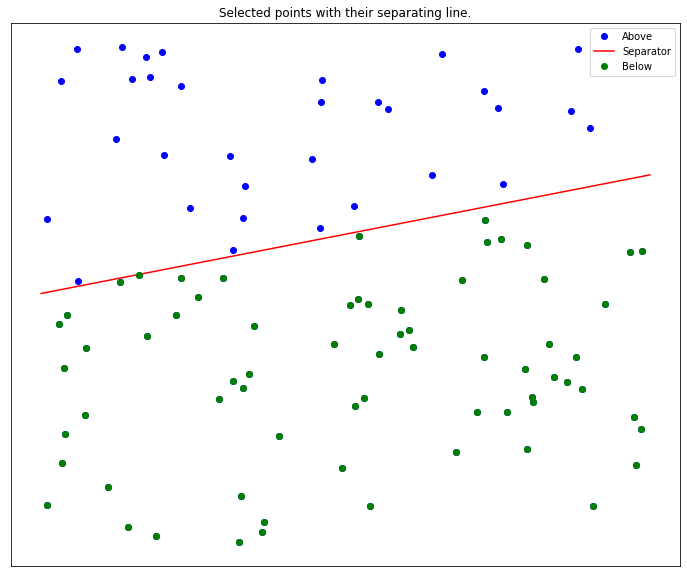

In [59]:
# Generate some points
N = 100
xn = nr.rand(N,2)

x = np.linspace(0,1);

# Pick a line 
a = nr.rand();
b = nr.rand();
f = lambda x : a*x + b;

fig =pl.figure()
figa = pl.gca();

pl.plot(xn[:,0],xn[:,1],'bo');
pl.plot(x,f(x),'r')

# Linearly separate the points by the line
yn = np.zeros([N,1]);

for i in range(N):
    if(f(xn[i,0])>xn[i,1]):
        # Point is below line
        yn[i] = 1;
        pl.plot(xn[i,0],xn[i,1],'go')
    else:
        # Point is above line
        yn[i] = -1;
        
        
pl.legend(['Above','Separator','Below'],loc=0)
pl.title('Selected points with their separating line.')
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)



In [60]:
def perceptron(xn,yn,MaxIter=100,w=np.zeros(3)):
    '''
        A very simple implementation of the perceptron algorithm for two dimensional data.
        
        Given points (x,y) with x in R^{2} and y in {0,1}, the perceptron learning algorithm searches for the best
        line that separates the data points according to the difference classes defined in y. 
        
        Input: 
            xn : Data points, an Nx2 vector. 
            yn : Classification of the previous data points, an Nx1 vector. 
            MaxIter : Maximum number of iterations (optional).
            w  : Initial vector of parameters (optional).
            
        Output: 
            w : Parameters of the best line, y = ax+b, that linearly separates the data. 
        
        Note:
            Convergence will be slower than expected, since this implementation picks points
            to update without a specific plan (randomly). This is enough for a demonstration, not 
            so good for actual work. 
'''
    
    N = xn.shape[0];
    
    # Separating curve
    f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1]);
    color=iter(cm.rainbow(np.linspace(0,1,10)))
    for rndind in range(MaxIter):
        i = nr.randint(N);
        if rndind % 10 == 0:
            bnew = -w[0]/w[2];
            anew = -w[1]/w[2];
            y = lambda x: anew * x + bnew
            col = next(color)
            pl.plot(x,y(x),'--',c=col,label='Line from perceptron round %d' % rndind)

        if(yn[i] != f(xn[i,:])): # If not classified correctly, adjust the line to account for that point.
             w[0] = w[0] + yn[i];
             w[1] = w[1] + yn[i]*xn[i,0];
             w[2] = w[2] + yn[i]*xn[i,1];
            
    return w;
    


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


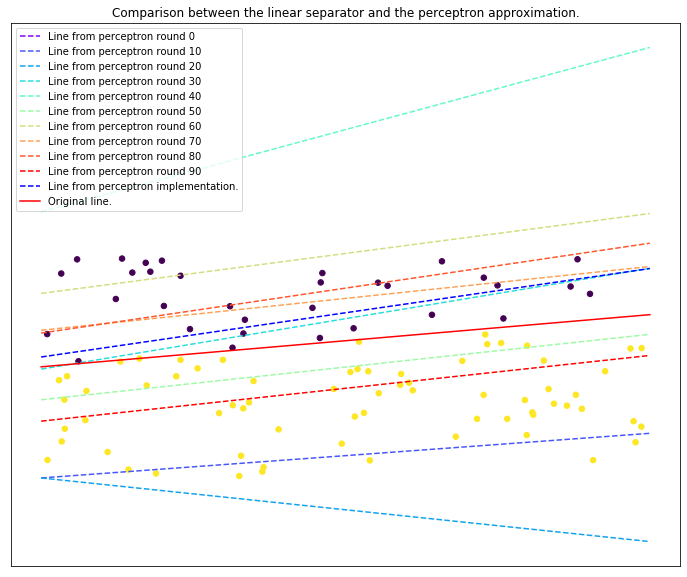

In [61]:
figa = pl.gca()
w= perceptron(xn,yn)

# Using weights w to compute a,b for a line y=a*x+b
bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

# Computing the colors for the points
sep_color = (yn+1)/2.0;

# pl.figure();


pl.scatter(xn[:,0],xn[:,1],c=sep_color.flatten(), s=30)
pl.plot(x,y(x),'b--',label='Line from perceptron implementation.')
pl.plot(x,f(x),'r',label='Original line.')
pl.legend()

pl.title('Comparison between the linear separator and the perceptron approximation.')

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)
